# Multiple linear regression


## Introduction


For this activity, we will continue the project for a Sales and Marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales.


They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

In [4]:
# Import relevant libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
# Load the dataset
data= pd.read_csv(r'C:\Users\user\Desktop\Course 5\marketing_sales_data.csv')

#Inspect the data
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


### The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)

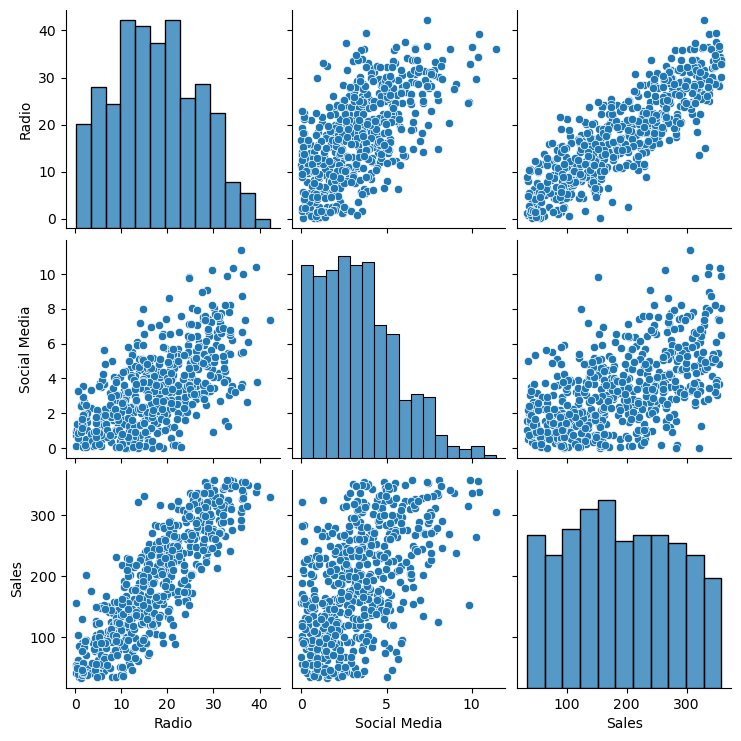

In [6]:
# Create a pairplot for the data
sns.pairplot(data);

### Quick Insight
`Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

`TV` and `Influencer` are excluded from the pairplot because they are not numeric. 

In [7]:
# Calculate the mean sales for each TV category. 
data.groupby('TV') ['Sales'].mean()

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

In [8]:
# Calculate the mean sales for each Influencer category .
data.groupby('Influencer') ['Sales'].mean()

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64

The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

These results can be investigated further when fitting the multiple linear regression model. 

In [9]:
# Checking for missing data
data.info()

data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


(572, 5)

## Model building

In [10]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model.
OLS = ols(formula= ols_formula, data= data)

# Fit the model.
model= OLS.fit()

# Save the results summary.
model_result = model.summary

# Display the model results.
model_result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        20:03:04   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions
 `For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: multicollinearity. Check that all five multiple linear regression assumptions are upheld for your model.`

## Model assumption: Linearity

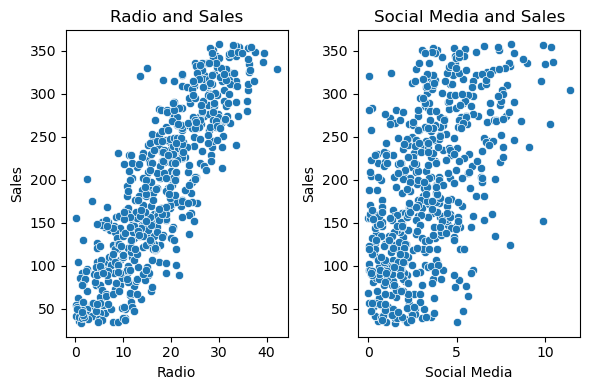

In [11]:
# Create a scatterplot for each independent variable and the dependent variable.
fig, axes= plt.subplots(1,2, figsize= (6,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[0])

# Set a title for the first plot
axes[0].set_title('Radio and Sales')

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x=data['Social Media'], y=data['Sales'], ax=axes[1])

# Set title for second plot
axes[1].set_title("Social Media and Sales")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()


The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. `Social Media` was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with `Sales`.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

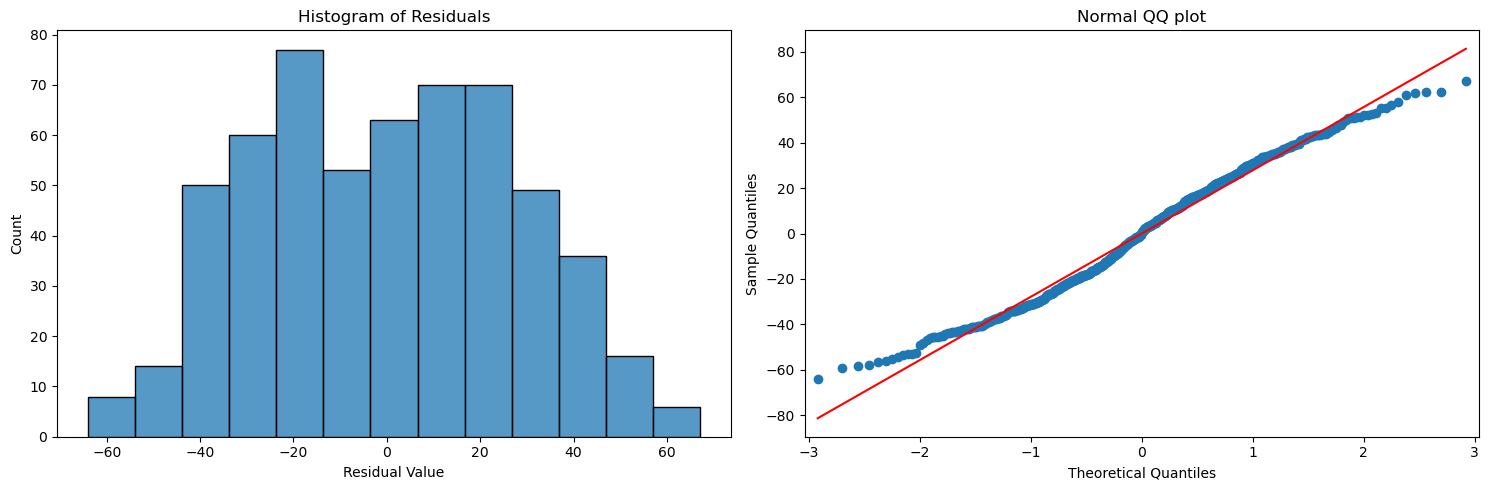

In [14]:
fig, axes= plt.subplots(1,2, figsize= (15,5))
# Calculate the residuals
model.resid

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line= 's', ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Normal QQ plot')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
 
#Show the plot
plt.show()

`The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.`

### Model assumption: Constant variance


Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

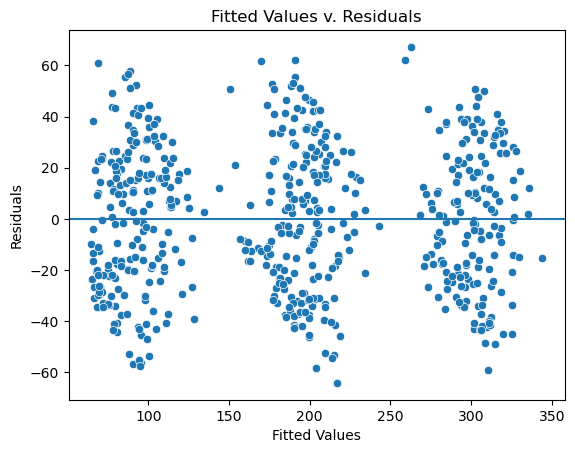

In [15]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig= sns.scatterplot(x= model.fittedvalues, y= model.resid)

# Set the x axis label.
fig.set_xlabel('Fitted Values')

# Set the y axis label
fig.set_ylabel('Residuals')

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

# Show the plot
plt.show()

### Quick Insight
     The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

    However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.


## Model assuptions: No multicolinearity


The **no multicolinearity** assumption states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other

Two common ways to check for multicolinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the Variance Inflation Facctor(VIF) to detect multicolinearity

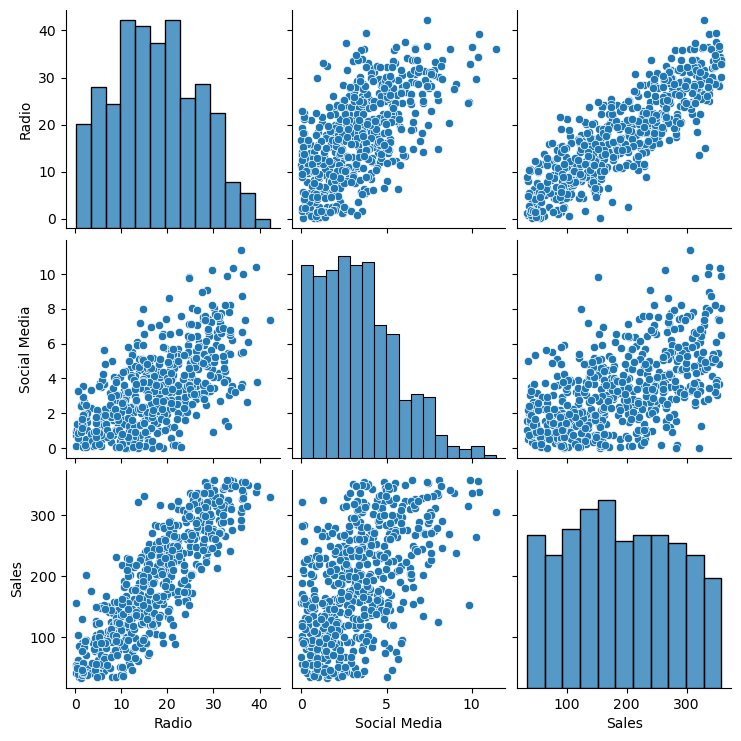

In [16]:
# Create a pairplot to check multicolinearity
sns.pairplot(data);

### Quick Insight
The preceding model only has one continous independent variable, meaning there are no multicollinearity issues. 

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption.

# Result and Evaluation

In [18]:
# Display the model result
model_result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        20:15:46   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quick Insights

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$


$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$


The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.


### Thoughts on improvement of model
Given how accurate `TV` was as a predictor, the model could be improved by getting a more granular view of the `TV` promotions, such as by considering more categories or the actual `TV` promotional budgets.

Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy. 



## Conclusion

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average than a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.


## My findings to stakeholders
High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 

